In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase.build import fcc111
from ase.visualize.plot import plot_atoms
from ase.constraints import FixAtoms
from ase.io import write
from ase.build import molecule
from ase.io import read
import json
from ase import Atoms
from glob import glob
import os
from ase.data import atomic_numbers, atomic_names, atomic_masses, covalent_radii
import shutil
from ase.io.pov import get_bondpairs, set_high_bondorder_pairs
from tqdm import tqdm



## Generate folders with coordinates

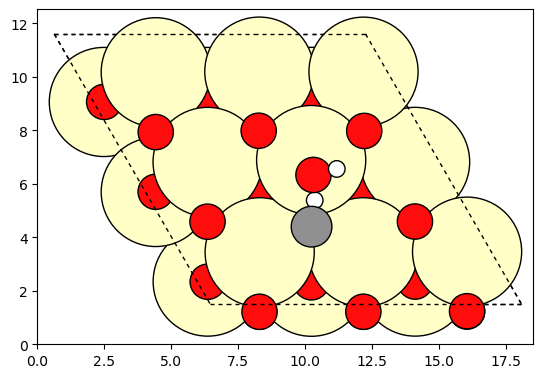

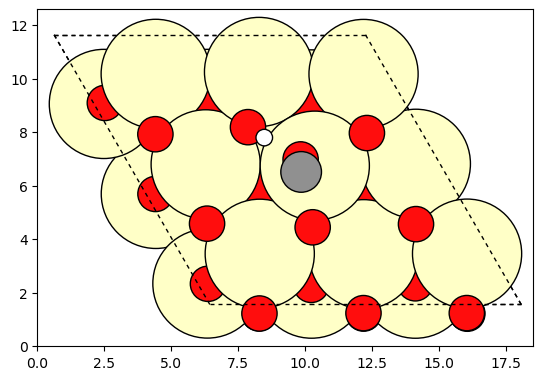

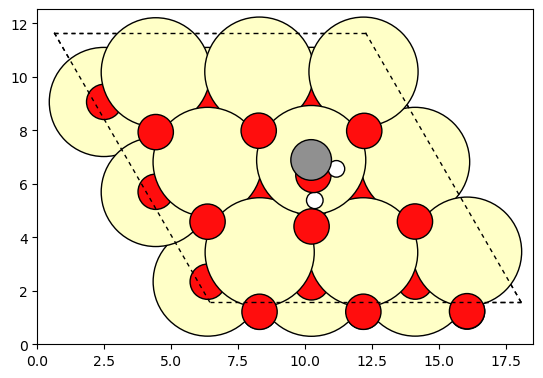

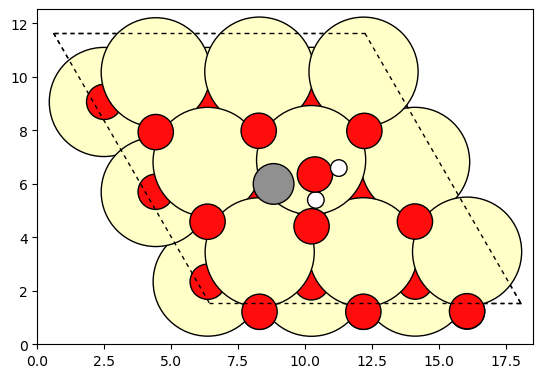

In [5]:
movie_path_list = glob('xyz_movies/*')
pp_xyz_movies_path = 'pp_xyz_movies'

cell = [[11.6375999450999998, 0.0, 0.0],
        [ -5.8188004494000003, 10.0784580173999991, 0.0],
        [0.0, 0.0, 13]]
for movie_path in movie_path_list:
    # Read the movie
    movie = read(movie_path, index=':')
    
    plt.show()
    Lx, Ly = 4, -4


    for frame in movie:
        frame.cell = cell
        frame.pbc = True
        frame.translate((Lx, Ly, 0))
        frame.wrap()
        # rotate frame 180 degrees around the z-axis
    
    for frame in movie:
        
        frame.rotate(180, 'z', center='COM')
        
    
    plot_atoms(movie[0])
    plt.show()   
        

    
    # Write the movie
    if not os.path.exists(pp_xyz_movies_path):
        os.makedirs(pp_xyz_movies_path)
    # Get the filename
    filename = os.path.basename(movie_path)
    write(os.path.join(pp_xyz_movies_path, filename), movie,)


    
#plot_atoms(frame,)


In [36]:
print(movie_path_list)

['xyz_movies/movie_S1_h2o_top_o_hb.xyz', 'xyz_movies/movie_S4_near_top_ce.xyz', 'xyz_movies/movie_S3_h2o_top_ce_w.xyz', 'xyz_movies/movie_S2_h2o_near_CV.xyz']


<Axes: >

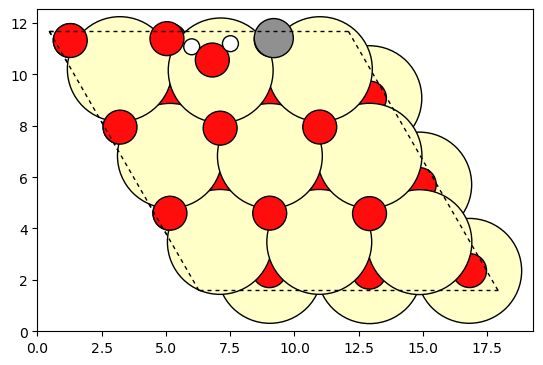

In [9]:
plot_atoms(frame,)

## FOR 3x3


In [1]:
import os
from glob import glob
from tqdm import tqdm
from ase.io import read, write
from ase.data import covalent_radii

# Update covalent radii
ce_radii = 1.9
o_radii = 0.66
custom_radii = {
    58: ce_radii,  # Ce
    17: ce_radii,  # Cl
    27: ce_radii,  # Co
    7:  ce_radii,  # N
    46: ce_radii,  # Pd
    39: ce_radii,  # Y
    57: ce_radii,  # La
    8:  o_radii,   # O
    79: o_radii    # Au
}
for element, radius in custom_radii.items():
    covalent_radii[element] = radius

In [7]:
movie_path_list = sorted(glob('pp_xyz_movies/*'))
for path in movie_path_list:
    print(path)

pp_xyz_movies/movie_S1_h2o_top_o_hb.xyz
pp_xyz_movies/movie_S2_h2o_near_CV.xyz
pp_xyz_movies/movie_S3_h2o_top_ce_w.xyz
pp_xyz_movies/movie_S4_near_top_ce.xyz


In [16]:
xyz_files[2:3]

['/home/manu/Desktop/phd_afm_simulations/segundo año/ceria_system/create_avi_movies_spectroscopies/pp_xyz_movies/movie_S3_h2o_top_ce_w.xyz']

In [19]:
import os
import shutil
import subprocess
from glob import glob

job_dir = "/home/manu/Desktop/phd_afm_simulations/segundo año/ceria_system/create_avi_movies_spectroscopies"
base_dir = os.path.join(job_dir, "pp_xyz_movies")
tmp_dir = os.path.join(base_dir, "TMP")
output_dir = os.path.join(job_dir, "rendered_movies")

# Cleanup output folder contents (but keep the folder itself)
if os.path.exists(output_dir):
    for filename in os.listdir(output_dir):
        file_path = os.path.join(output_dir, filename)
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
else:
    os.makedirs(output_dir)

# Cleanup TMP
if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)
os.makedirs(tmp_dir)

# Find xyz files
xyz_files = sorted(glob(os.path.join(base_dir, "*.xyz")))

for xyz_path in xyz_files:
    movie_name = os.path.splitext(os.path.basename(xyz_path))[0]
    work_dir = os.path.join(tmp_dir, movie_name)
    os.makedirs(work_dir, exist_ok=True)

    xyz_filename = os.path.basename(xyz_path)
    xyz_tmp_path = os.path.join(work_dir, xyz_filename)
    shutil.copy2(xyz_path, xyz_tmp_path)

    # Call subprocess with: render_one.py xyz_file movie_name output_dir
    try:
        subprocess.run([
            "python3", os.path.join(job_dir, "render_one.py"),
            xyz_filename, movie_name, output_dir
        ], check=True, cwd=work_dir)

    except subprocess.CalledProcessError as e:
        print(f"❌ Subprocess failed for {movie_name}: {e}")
        continue

    shutil.rmtree(work_dir)

# Final TMP cleanup
shutil.rmtree(tmp_dir)
print("✅ All movies rendered using isolated subprocesses.")


🎬 Rendering /home/manu/Desktop/phd_afm_simulations/segundo año/ceria_system/create_avi_movies_spectroscopies/rendered_movies/movie_S1_h2o_top_o_hb_top.avi ...
🎬 Rendering /home/manu/Desktop/phd_afm_simulations/segundo año/ceria_system/create_avi_movies_spectroscopies/rendered_movies/movie_S1_h2o_top_o_hb_front.avi ...
🎬 Rendering /home/manu/Desktop/phd_afm_simulations/segundo año/ceria_system/create_avi_movies_spectroscopies/rendered_movies/movie_S2_h2o_near_CV_top.avi ...
🎬 Rendering /home/manu/Desktop/phd_afm_simulations/segundo año/ceria_system/create_avi_movies_spectroscopies/rendered_movies/movie_S2_h2o_near_CV_front.avi ...
🎬 Rendering /home/manu/Desktop/phd_afm_simulations/segundo año/ceria_system/create_avi_movies_spectroscopies/rendered_movies/movie_S3_h2o_top_ce_w_top.avi ...
🎬 Rendering /home/manu/Desktop/phd_afm_simulations/segundo año/ceria_system/create_avi_movies_spectroscopies/rendered_movies/movie_S3_h2o_top_ce_w_front.avi ...
🎬 Rendering /home/manu/Desktop/phd_afm_sim